# Анализ развлекательного приложения Procrastinate Pro+

## Описание проекта

Представим, что мы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.
Нам предстоит изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

## Загрузка данных и изучение общей информации

Прочтем и сохраним в переменные данные о визитах, заказах и рекламных расходах из CSV-файлов.
Для начала импортируем необходимые библиотеки для анализа данных.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
try:
    visits = pd.read_csv('visits_info_short.csv', sep=',', decimal='.')
    orders = pd.read_csv('orders_info_short.csv', sep=',', decimal='.')
    costs = pd.read_csv('costs_info_short.csv', sep=',', decimal='.')
except: 
    visits = pd.read_csv('http://localhost:8890/edit/Downloads/visits_info_short.csv', sep=',', decimal='.')
    orders = pd.read_csv('http://localhost:8890/edit/Downloads/orders_info_short.csv', sep=',', decimal='.')
    costs = pd.read_csv('http://localhost:8890/edit/Downloads/costs_info_short.csv', sep=',', decimal='.')

In [3]:
# выведем на экран первые 10 строчек датафрейма visits
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
# выведем на экран первые 10 строчек датафрейма orders
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [5]:
# выведем на экран первые 10 строчек датафрейма costs
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


Посмотрим информацию о датафреймах visits, orders и costs.

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Вывод**

Пропусков нет, необходимо преобразовать тип данных в столбцах Session Start, Session End и Event Dt во временной тип данных, привести все названия в датафреймах к нижнему регистру.

## Предобработка данных

Приведем все названия к нижнему регистру написания.

In [9]:
visits.columns = visits.columns.str.lower()
visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()
# добавим "змеиный регистр" в названиях столбцов
visits = visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})
# выведем первые пять строк
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [10]:
# переименуем названия столбцов в датафрейме orders
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'})
# выведем первые пять строк
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [11]:
# приведем к нижнему регистру столбец 'Channel' в датафрейме costs
costs = costs.rename(columns={'Channel': 'channel'})
costs['channel'] = costs['channel'].str.lower()
# выведем первые пять строк
costs.head()

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1


Преобразуем тип данных в столбцах Session Start, Session End и Event Dt во временной тип данных.

In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

Еще раз посмотрим общую информацию о датафреймах, чтобы убедиться в корректности типов данных.

In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Проверим датафреймы на наличие явных дубликатов.

In [16]:
visits.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

In [18]:
costs.duplicated().sum()

0

**Вывод**

В предобработке данных привели все названия к единому регистру написания, изменили тип данных в столбцах 'session_start', 'session_end', 'event_dt' и 'dt'. Также проверили, что в датафреймах отсутствуют явные дубликаты. 

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Напишем функции для создания профилей, расчёта удержания, конверсии, LTV и ROI: get_profiles(), get_retention(), get_conversion() и get_ltv().

In [19]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

   # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [22]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

А также напишем функции для построения графиков визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [23]:
# функция для сглаживания данных

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [24]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм', fontsize = 14)
    plt.title('Удержание платящих пользователей', fontsize = 14)

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм', fontsize = 14)
    plt.title('Удержание неплатящих пользователей', fontsize = 14)

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения', fontsize = 14)
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        ), fontsize = 14
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения', fontsize = 14)
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        ), fontsize = 14
    )
    
    plt.tight_layout()
    plt.show() 

In [25]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм', fontsize = 14)
    plt.title('Конверсия пользователей', fontsize = 14)

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения', fontsize = 14)
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon), fontsize = 14)

    plt.tight_layout()
    plt.show()

In [26]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 10))

    # из таблицы lTV исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм', fontsize = 14)
    plt.title('LTV', fontsize = 14)

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения', fontsize = 14)
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize = 14)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения', fontsize = 14)
    plt.title('Динамика стоимости привлечения пользователей', fontsize = 14)

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм', fontsize = 14)
    plt.title('ROI', fontsize = 14)

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения', fontsize = 14)
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize = 14)

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Получим профили пользователей. Для этого используем функцию get_profiles().

In [27]:
profiles = get_profiles(visits, orders, costs)
# выведем первые 10 строк
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,android,united states,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,android,united states,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,adnonsense,android,france,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,faceboom,iphone,united states,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,mediatornado,iphone,united states,2019-05-11,2019-05-01,False,0.250435


In [28]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  datetime64[ns]
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 10.4+ MB


Определим минимальную и максимальную даты привлечения пользователей.

In [29]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()  

print('Минимальная дата привлечения пользователей:', min_analysis_date) 
print('Максимальная дата привлечения пользователей:', observation_date)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:00
Максимальная дата привлечения пользователей: 2019-10-27 00:00:00


Минимальная дата привлечения пользователей: 1 мая 2019 года; максимальная дата привлечения пользователей: 27 октября 2019 года. Эти даты соответсвуют датам в задании.

Выясним: из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Для начала построим таблицу, отражающую количество пользователей и их долю из каждой страны.

In [30]:
user_region = profiles.pivot_table(index='region', values='user_id', aggfunc='count').reset_index()
user_region['share'] = ((user_region['user_id'] / profiles['region'].count()) * 100)
user_region.columns = ['Регион', 'Количество пользователей', 'Доля пользователей']
user_region.sort_values(by='Доля пользователей', ascending=False).style.format({'Доля пользователей': '{:.2f}%'})

,Регион,Количество пользователей,Доля пользователей
3,united states,100002,66.66%
2,uk,17575,11.72%
0,france,17450,11.63%
1,germany,14981,9.99%


В исходных данных у нас имеется информация о пользователях из четырех стран: США, Англия, Франция и Германия. Как видно из таблицы выше большее количество пользователей приложением Procrastinate Pro+ находятся в США (100 002 пользователя), что составляет 66,66% из всех пользователей. Почти равное количество пользователей в Англии и Франции (17 575 и 17 450 соответвенно). Доля из всех пользователей в Англии составляет 11,72%, а во Франции - 11,63%. В Германии количество пользователей приложением Procrastinate Pro+ составляет 14 981 (9,99% от всех пользователей).

Теперь посмотрим на количество платящих пользователей и их долю из каждой страны.

In [31]:
user_payer = profiles.query('payer == True').pivot_table(index='region', values='user_id', aggfunc='count').reset_index()
user_payer['share'] = ((user_payer['user_id'] / profiles.query('payer == True')['region'].count()) * 100)
user_payer.columns = ['Регион', 'Количество платящих пользователей', 'Доля платящих']
user_payer.sort_values(by='Доля платящих', ascending=False).style.format({'Доля платящих': '{:.2f}%'})

,Регион,Количество платящих пользователей,Доля платящих
3,united states,6902,77.72%
2,uk,700,7.88%
0,france,663,7.47%
1,germany,616,6.94%


Как видно из таблицы выше большее количество платящих пользователей приложением Procrastinate Pro+ находятся в США (6 902 пользователя), что составляет 77,72% из всех платящих пользователей. Количество платящих пользователей в Англии и Франции составляет 700 и 663 человека соответвенно. Доля из всех платящих пользователей в Англии составляет 7,88%, а во Франции - 7,47%. В Германии количество платящих пользователей приложением Procrastinate Pro+ составляет 616 человек (6,94% от всех платящих пользователей).

Сделаем сводную таблицу, где будет показано распределение количества пользователей, количество платящих пользователей и доля платящих пользователей по странам.

In [32]:
user_region_payer = user_region.merge(user_payer, on='Регион', how='left')
user_region_payer['Доля платящих'] = (
    user_region_payer['Количество платящих пользователей'] *100) / user_region_payer['Количество пользователей']
user_region_payer.sort_values(
    by='Доля платящих', ascending=False).style.format({'Доля пользователей': '{:.2f}%', 'Доля платящих': '{:.2f}%'})

,Регион,Количество пользователей,Доля пользователей,Количество платящих пользователей,Доля платящих
3,united states,100002,66.66%,6902,6.90%
1,germany,14981,9.99%,616,4.11%
2,uk,17575,11.72%,700,3.98%
0,france,17450,11.63%,663,3.80%


**Вывод**

В исходных данных у нас имеется информация о пользователях из четырех стран: США, Англия, Франция и Германия. Как видно из таблицы user_region большее количество пользователей приложением Procrastinate Pro+ находятся в США (100 002 пользователя), что составляет 66,66% из всех пользователей приложением Procrastinate Pro+. Количество платящих пользователей в США - 6 902, что составляет 6,90% от всех пользователей в США. Почти равное количество пользователей в Англии и Франции (17 575 и 17 450 соответвенно). Доля из всех пользователей в Англии составляет 11,72%, а во Франции - 11,63%. Количество платящих пользователей в Англии - 700 человек (3,98% от всех пользователей в Англии), а во Франции - 663 человека (3,80% от всех пользователей во Франции). В Германии количество пользователей приложением Procrastinate Pro+ составляет 14 981 (9,99% от всех пользователей) и 616 платящих пользователей, что составляет 4,11% от всех пользователей в Германии.

Посмотрим: какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [33]:
device_user = profiles.pivot_table(index='device', values='user_id', aggfunc='count').reset_index()
device_user['share'] = ((device_user['user_id'] / profiles['device'].count()) * 100)
device_user.columns = ['Тип устройства пользователя', 'Количество пользователей', 'Доля пользователей']
device_user.sort_values(by='Доля пользователей', ascending=False).style.format({'Доля пользователей': '{:.2f}%'})

,Тип устройства пользователя,Количество пользователей,Доля пользователей
1,iphone,54479,36.32%
0,android,35032,23.35%
3,pc,30455,20.30%
2,mac,30042,20.03%


Исходя из таблицы выше, клиенты в основном пользуются IPhone - 54 479 человек (36,32%), меньше пользователей, которые заходят в приложение с Android - всего 35 032 человека (23,35%). Примерно одинаковое количество людей используют РС- 30 455 человек (20,30%), и МАС - 30 042 человека (20,03%).

Теперь найдем количество платящих пользователей, использующих IPhone, Android, РС и МАС соответственно.

In [34]:
device_payer = profiles.query('payer == True').pivot_table(index='device', values='user_id', aggfunc='count').reset_index()
device_payer['share'] = ((device_payer['user_id'] / profiles.query('payer == True')['device'].count()) * 100)
device_payer.columns = ['Тип устройства пользователя', 'Количество платящих пользователей', 'Доля платящих']
device_payer.sort_values(by='Доля платящих', ascending=False).style.format({'Доля платящих': '{:.2f}%'})

,Тип устройства пользователя,Количество платящих пользователей,Доля платящих
1,iphone,3382,38.08%
0,android,2050,23.08%
2,mac,1912,21.53%
3,pc,1537,17.31%


Больше всего платящих пользователей, которые пользуются Iphone (3 3382 человека, что составляет 38,08% от всех платящих пользователей). Меньше всего платящих пользователей, пользующиеся РС - 1 537 человек (17,31%). 2 050 платящих пользователей заходят в приложение с Android, их доля составляет 23,08%. МАС используют 1 912 платящих пользователей, это 21,53% от всех платящих пользователей.

Сделаем сводную таблицу с общим количеством пользователей, количеством платящих пользователей и долей платящих пользователей от общего числа пользователей в зависимости от типа устройства.

In [35]:
user_device_payer = device_user.merge(device_payer, on='Тип устройства пользователя', how='left')
user_device_payer['Доля платящих'] = (
    user_device_payer['Количество платящих пользователей'] *100) / user_device_payer['Количество пользователей']
user_device_payer.sort_values(
    by='Доля пользователей', ascending=False).style.format({'Доля пользователей': '{:.2f}%', 'Доля платящих': '{:.2f}%'})

,Тип устройства пользователя,Количество пользователей,Доля пользователей,Количество платящих пользователей,Доля платящих
1,iphone,54479,36.32%,3382,6.21%
0,android,35032,23.35%,2050,5.85%
3,pc,30455,20.30%,1537,5.05%
2,mac,30042,20.03%,1912,6.36%


**Вывод**

Большее количество пользователей приложения Procrastinate Pro+ используют IPhone - 54 479 человек (36,32% от всех пользователей приложением), из них 3 382 человека являются платящими. Доля платящих пользователей из использующих IPhone составляет 6,21%. Android использует 35 032 пользователей приложения (23,35% от всех пользователей приложения), из них 2 050 человек являются платящими. Доля платящих пользователей из использующих Android составляет 5,85%. Персональным компьютером (РС) пользуется 30 455 пользователей приложения Procrastinate Pro+ (20,30% от всех пользователей приложения), из них 1 537 человек являются платящими. Доля платящих пользователей из использующих РС составляет 5,05%. МАС использует 30 042 пользователей приложения (20,03% от всех пользователей приложения), из них 1 912 человек являются платящими. Доля платящих пользователей из использующих МАС составляет 6,36%.

Посмотрим рекламные источники привлечения и определим каналы, из которых пришло больше всего пользователей. 

In [36]:
channel_user = profiles.pivot_table(index='channel', values='user_id', aggfunc='count').reset_index()
channel_user['share'] = ((channel_user['user_id'] / profiles['channel'].count()) * 100)
channel_user.columns = ['Рекламный источник', 'Количество пользователей', 'Доля пользователей']
channel_user.sort_values(by='Доля пользователей', ascending=False).style.format({'Доля пользователей': '{:.2f}%'})

,Рекламный источник,Количество пользователей,Доля пользователей
6,organic,56439,37.62%
1,faceboom,29144,19.43%
8,tiptop,19561,13.04%
5,opplecreativemedia,8605,5.74%
3,leapbob,8553,5.70%
9,wahoonetbanner,8553,5.70%
7,rocketsuperads,4448,2.97%
4,mediatornado,4364,2.91%
10,yrabbit,4312,2.87%
0,adnonsense,3880,2.59%


Из таблицы выше видно, что у нас 11 источников, из которых приходят пользователи приложения Procrastinate Pro+: один органический (люди сами находят приложение) и 10 рекламных источников. Количество пользователей, которые сами приходят в приложение составляет 56 439 (это 37,62% от всех пользователей приложения Procrastinate Pro+). При рассмотрении количества пользователей, приходящих из рекламных источников, видно, что больше людей приходят из Faceboom - 29 144 человека (19,43% от всех пользователей приложения). Немного меньше людей приходят из рекламного источника Tiptop - 19 561 пользователь (13,04). Далее можно выделить три рекламных источника, где количество привлеченных пользователей примерно одинаково: Opplecreativemedia, Leapbob, Wahoonetbanner - 8 605 пользователей (5,74%), 8 553 пользователя (5,70%) и 8 553 пользователя (5,70%) соответственно. Аналогичным образом по привлечению пользователей в приложение Procrastinate Pro+ похожи следующие три рекламных источника: Rocketsuperads, Mediatornado, Yrabbit - 4 448 пользователей (2,97%), 4 364 пользователя (2,91%) и 4 312 пользователей (2,87%) соответственно. Меньшее количество пользовотелей приходят из двух рекламный источников: Adnonsense - 3 880 человек (2,59%), и Lambdamediaads - 2 149 человек (1,43%).

Теперь найдем количество платящих пользователей, которые пришли из каждого рекламного источника.

In [37]:
channel_payer = profiles.query('payer == True').pivot_table(index='channel', values='user_id', aggfunc='count').reset_index()
channel_payer['share'] = ((channel_payer['user_id'] / profiles.query('payer == True')['channel'].count()) * 100)
channel_payer.columns = ['Рекламный источник', 'Количество платящих пользователей', 'Доля платящих']
channel_payer.sort_values(by='Доля платящих', ascending=False).style.format({'Доля платящих': '{:.2f}%'})

,Рекламный источник,Количество платящих пользователей,Доля платящих
1,faceboom,3557,40.05%
8,tiptop,1878,21.15%
6,organic,1160,13.06%
9,wahoonetbanner,453,5.10%
0,adnonsense,440,4.95%
7,rocketsuperads,352,3.96%
3,leapbob,262,2.95%
5,opplecreativemedia,233,2.62%
2,lambdamediaads,225,2.53%
10,yrabbit,165,1.86%


Согласно таблице 'channel_payer' большее количество платящих пользователей приходит из рекламного источника Faceboom - 3 557 человек (это 40,05% от всех платящих пользователей приложения Procrastinate Pro+). Далее идет рекламный источник Tiptop: из него приходит 1 878 платящих пользователей (21,15%). Из органически привлеченных пользователей только 1 160 (13,06%) являются платящими. Рекламные источники Wahoonetbanner, Adnonsense и Rocketsuperads привлекают 453 платящих пользователя (5,10% от всех платящих пользователей), 440 платящих пользователей (4,95%) и 352 платящих пользователя (3,96%) соответственно. Рекламные источники Leapbob, Opplecreativemedia и Lambdamediaads привлекают 262 платящих пользователя (2,95% от всех платящих пользователей), 233 платящих пользователя (2,62%) и 225 платящих пользователей (2,53%) соответственно. Меньше всего платящих пользователей приходят из рекламных источников Yrabbit - 165 человек (1,86%), и Mediatornado - 156 человек (1,76%).

Сделаем сводную таблицу с общим количеством пользователей, количеством платящих пользователей и долей платящих пользователей от общего числа пользователей в зависимости от рекламного источника.

In [38]:
user_channel_payer = channel_user.merge(channel_payer, on='Рекламный источник', how='left')
user_channel_payer['Доля платящих'] = (
    user_channel_payer['Количество платящих пользователей'] *100) / user_channel_payer['Количество пользователей']
user_channel_payer.sort_values(
    by='Доля платящих', ascending=False).style.format({'Доля пользователей': '{:.2f}%', 'Доля платящих': '{:.2f}%'})

,Рекламный источник,Количество пользователей,Доля пользователей,Количество платящих пользователей,Доля платящих
1,faceboom,29144,19.43%,3557,12.20%
0,adnonsense,3880,2.59%,440,11.34%
2,lambdamediaads,2149,1.43%,225,10.47%
8,tiptop,19561,13.04%,1878,9.60%
7,rocketsuperads,4448,2.97%,352,7.91%
9,wahoonetbanner,8553,5.70%,453,5.30%
10,yrabbit,4312,2.87%,165,3.83%
4,mediatornado,4364,2.91%,156,3.57%
3,leapbob,8553,5.70%,262,3.06%
5,opplecreativemedia,8605,5.74%,233,2.71%


**Вывод**

В итоге из 11 источников, из которых приходят пользователи приложения Procrastinate Pro+, на первом месте по привлечению платящих пользователей находится рекламный источник Faceboom. Доля платящих пользователей в этом источнике составляет 12,20% от общего количества пользователей (29 144 человека), привлеченных этим источником. Далее идут рекламные источники Adnonsense, Lambdamediaads и Tiptop.	Доля платящих пользователей в Adnonsense составляет 11,34% от 3 880 пользователей, привлеченных этим источником. Доля платящих пользователей в Lambdamediaads составляет 10,47% от 2 149 количества пользователей, привлеченных этим источником. Доля платящих пользователей в Tiptop составляет 9,6% от общего количества пользователей (19 561 человек), привлеченных этим источником. Рекламные источники Rocketsuperads и Wahoonetbanner привлекли 4 448 пользователей и 8 553 пользователя соответственно. А вот доля платящий пользователей составляет 7, 91% для рекламного источника Rocketsuperads	и 5,30% для Wahoonetbanner. Доля платящих пользователей в рекламном источнике Yrabbit составляет 3,83% от 4 312 пользователей, привлеченных этим источником. Реламный источник Mediatornado привлек 4 364 пользователя, доля платящих из них составила 3,57%. А рекламные источники Leapbob и Opplecreativemedia привлекли по 8 553 и 8 605 пользователей соответственно, но доли платящих пользователей составили 3,06% для Leapbob и 2,71% для Opplecreativemedia. Количество пользователей, которые сами находят приложение Procrastinate Pro+ составляет 56 439, но только 1 160 пользователей являются платящими (это 2,06% от органического количества пользователей).

### Маркетинг

Посчитаем общую сумму расходов на маркетинг за период с 1 мая по 27 октября 2019 года.

In [39]:
total_costs = costs['costs'].sum().round(decimals=2)
total_costs

105497.3

Посмотрим: сколько денег было потрачено на каждый рекламный источник.

In [40]:
channel_costs = costs.pivot_table(index='channel', values='costs', aggfunc='sum').reset_index()
channel_costs.columns = ['Рекламный источник', 'Расходы']
channel_costs.sort_values(by='Расходы', ascending=False)

,Рекламный источник,Расходы
7,tiptop,54751.30
1,faceboom,32445.60
8,wahoonetbanner,5151.00
0,adnonsense,3911.25
5,opplecreativemedia,2151.25
6,rocketsuperads,1833.00
3,leapbob,1797.60
2,lambdamediaads,1557.60
4,mediatornado,954.48
9,yrabbit,944.22


Больше всего было потрачено на рекламный источник Tiptop (54 751,30). Далее по расходам идет Faceboom - 32 445,60. Затем расходы распределяются так: рекламный источник Wahoonetbanner - 5 151; Adnonsense - 3 911,25; Opplecreativemedia - 2 151,25; Rocketsuperads - 1 833; Leapbob - 1 797,60; Lambdamediaads - 1 557,60. Меньше всего расходов было на рекламные источники Mediatornado (954,48) и Yrabbit (944,22).

Посмотрим на динамику изменения расходов во времени (по неделям и месяцам) по каждому источнику. Для этого добавим в таблицу costs столбцы 'week' и 'month'. А после построим графики динамики изменения расходов по неделям и по месяцам для каждого источника.

In [41]:
# добавляем столбцы в таблицу costs
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
# посмотрим первые пять строк 
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,faceboom,113.3,18,5
1,2019-05-02,faceboom,78.1,18,5
2,2019-05-03,faceboom,85.8,18,5
3,2019-05-04,faceboom,136.4,18,5
4,2019-05-05,faceboom,122.1,18,5


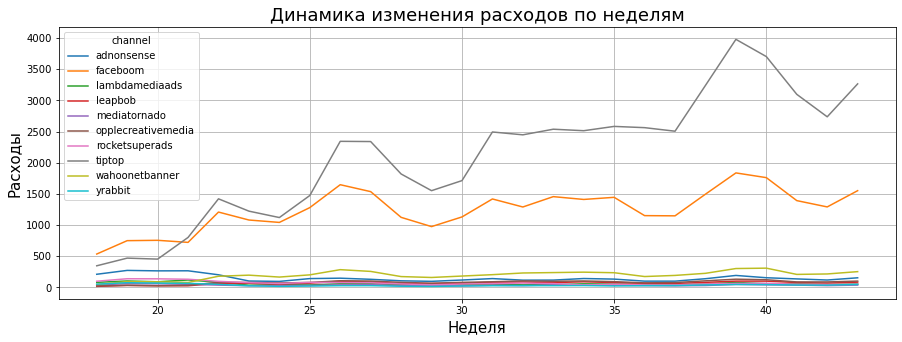

In [42]:
# строим график динамики изменения расходов по неделям с разбивкой по каждому рекламному источнику
costs_week = costs.pivot_table(columns = 'channel', index = 'week', values = 'costs', aggfunc = 'sum')

costs_week.plot(grid=True, figsize=(15,5))
plt.legend(labels=costs_week.columns, title=costs_week.columns.name, loc = 'upper left')
plt.xlabel('Неделя', fontsize = 15)
plt.ylabel('Расходы', fontsize = 15)
plt.title('Динамика изменения расходов по неделям', fontsize = 18)
 
plt.show()

Судя по графику динамики изменения расходов по неделям, выделяется два рекламных источника: Tiptop и Faceboom. Можно наблюдать рост расходов по этим рекламным каналам, хотя есть и недели, когда наблюдался спад расходов. С 18ой по 20ую неделю рост расходов особо ненаблюдается у Tiptop, а после 20ой неделе заметен рост расходов с 500 почти до 1500. Далее в период с 25ой недели по 31ую неделю динамика расходов по этому рекламному источнику колеблется в пределах от 1500 до 2500. После 31ой недели рост расходов  на Tiptop практически не меняется, а вот примерно после 37ой недели резко возрастает от 2500 до 4000. После 39ой недели рост расходов на рекламный источник Tiptop снижается до 2750, а после примерно 43ей недели снова наблюдается рост расходов по этому рекламному источнику. Насчет динамики расходов на рекламный источник Faceboom резких колебаний расходов, как на Tiptop нет. После 21ой недели есть рост расходов на Faceboom с примерно 750 до 1250, далее рост расходов снижается до 1000 и после 24ой недели начинает расти до 1600. С 26ой недели по 29ую неделю на графике виден спад расходов на этот рекламный источник (с 1600 до 1000). Далее динамика изменения расходов на Faceboom колеблется от 1400 до 1490, а после 35ой недели снижается до примерно 1200. После 37ой недели снова есть рост расходов на этот рекламный источник (с 1200 до 1800). А с 39ой недели динамика расходов на Faceboom снижается до примерно 1250 и, как у рекламного источника Tiptop, примерно 43ей недели снова наблюдается рост расходов на Faceboom. По расходам на остальные рекламные источники можно сказать, что они практически не изменялись по неделям. 

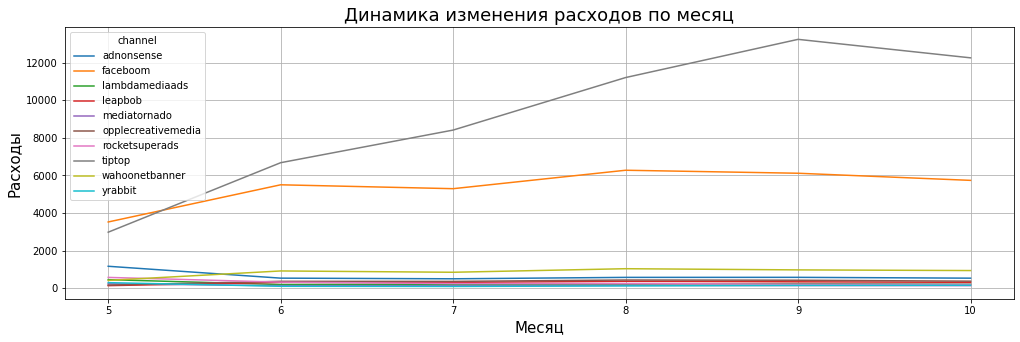

In [43]:
# строим график динамики изменения расходов по месяцам с разбивкой по каждому рекламному источнику
costs_month = costs.pivot_table(columns = 'channel', index = 'month', values = 'costs', aggfunc = 'sum')

costs_month.plot(grid=True, figsize=(17,5))
plt.legend(labels=costs_month.columns, title=costs_month.columns.name, loc = 'upper left')
plt.xlabel('Месяц', fontsize = 15)
plt.ylabel('Расходы', fontsize = 15)
plt.title('Динамика изменения расходов по месяц', fontsize = 18)
 
plt.show()

Динамика изменения расходов по месяцам для каждого рекламного источника похожа на динамику изменения расходов по неделям. На графике виден более плавный рост расходов на рекламный источник Tiptop - с мая по сентябрь расходы на этот рекламный источник возрастают с 2500 до примерно 13500, а с сентября по октябрь наблюдается спад расходов до примерно 12100. Рост расходов на рекламный источник Faceboom наблюдается с мая по июнь (примерно с 3500 до 5500). Также рост расходов на этот рекламный источник виден с июля по август, а после августа расходы на Faceboom потихоньку начали снижаться. Также можно отменить, что с мая по июнь снизились расходы на рекламный источник Adnonsense, а по Wahoonetbanner немного возрасли расходы. По остальным рекламным источникам динамики изменений расходов по месяцам не наблюдается. 

Посмотрим: сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [44]:
channel_user_costs = channel_user.merge(channel_costs, on='Рекламный источник', how='left')
channel_user_costs = channel_user_costs.drop('Доля пользователей', axis=1)
channel_user_costs = channel_user_costs[channel_user_costs['Рекламный источник']!='organic']
channel_user_costs['cac'] = (channel_user_costs['Расходы']/channel_user_costs['Количество пользователей']).round(decimals=2)
channel_user_costs.sort_values(by='cac', ascending=False)

,Рекламный источник,Количество пользователей,Расходы,cac
8,tiptop,19561,54751.30,2.80
1,faceboom,29144,32445.60,1.11
0,adnonsense,3880,3911.25,1.01
2,lambdamediaads,2149,1557.60,0.72
9,wahoonetbanner,8553,5151.00,0.60
7,rocketsuperads,4448,1833.00,0.41
5,opplecreativemedia,8605,2151.25,0.25
4,mediatornado,4364,954.48,0.22
10,yrabbit,4312,944.22,0.22
3,leapbob,8553,1797.60,0.21


Из таблице выше видно, что самое дорогое привлечение пользователей у рекламного источника Tiptop - 2.80 в среднем на привлечение одного пользователя. Далее по дороговизне привлечения пользователей идут рекламные источники Faceboom (1.11 в среднем на привлечение одного пользователя) и Adnonsense (1.01 в среднем на привлечение одного пользователя). Среднее привлечение одного пользователя составляет 0.72 для рекламного источника Lambdamediaads, 0.60 для Wahoonetbanner и 0.41 для Rocketsuperads. Для рекламного источника Opplecreativemedia среднее привлечение одного пользователя составляет 0.25, для Mediatornado и Yrabbit - 0.22 среднее привлечение одного пользователя. Самое дешевое среднее привлечение одного пользователя у рекламного источника Leapbob - 0.21.

In [45]:
# посчитаем: сколько в среднем стоило привлечение одного пользователя (CAC) по всему проекту
cac_mean = round(profiles['acquisition_cost'].mean(), 2)
print('Среднее привлечение одного пользователя по всему проекту составляет', cac_mean)

Среднее привлечение одного пользователя по всему проекту составляет 0.7


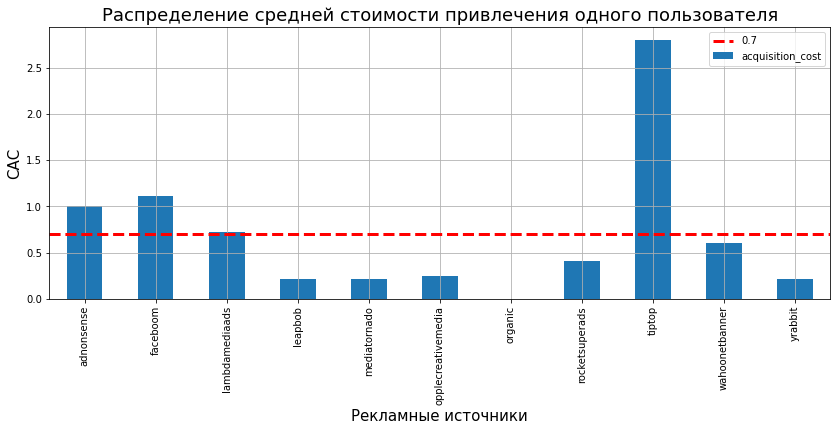

In [46]:
channel_cac = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
channel_cac.plot(kind='bar', figsize=(14,5))
plt.axhline(y=cac_mean,
                linewidth=3, 
                color='red', 
                linestyle='--',
                label=str(cac_mean))
plt.title('Распределение средней стоимости привлечения одного пользователя', fontsize = 18)
plt.xlabel('Рекламные источники', fontsize = 15)
plt.ylabel('САС', fontsize = 15)
plt.legend()
plt.grid()
plt.show()

### Оценка окупаемости рекламы

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также посмотрим графики динамики LTV, CAC и ROI.

Исключим из таблицы профилей пользователей тех, кто сам нашел приложение, так как их привлечение нам ничего не стоило.

In [47]:
profiles = profiles.query('channel != "organic"')
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,adnonsense,android,france,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,faceboom,iphone,united states,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,mediatornado,iphone,united states,2019-05-11,2019-05-01,False,0.250435
12,69985732,2019-10-09 21:36:33,rocketsuperads,mac,united states,2019-10-09,2019-10-01,False,0.251613
17,93828625,2019-07-24 05:56:22,leapbob,iphone,germany,2019-07-24,2019-07-01,False,0.204324
19,112595447,2019-08-04 06:39:43,tiptop,iphone,united states,2019-08-04,2019-08-01,False,3.000000


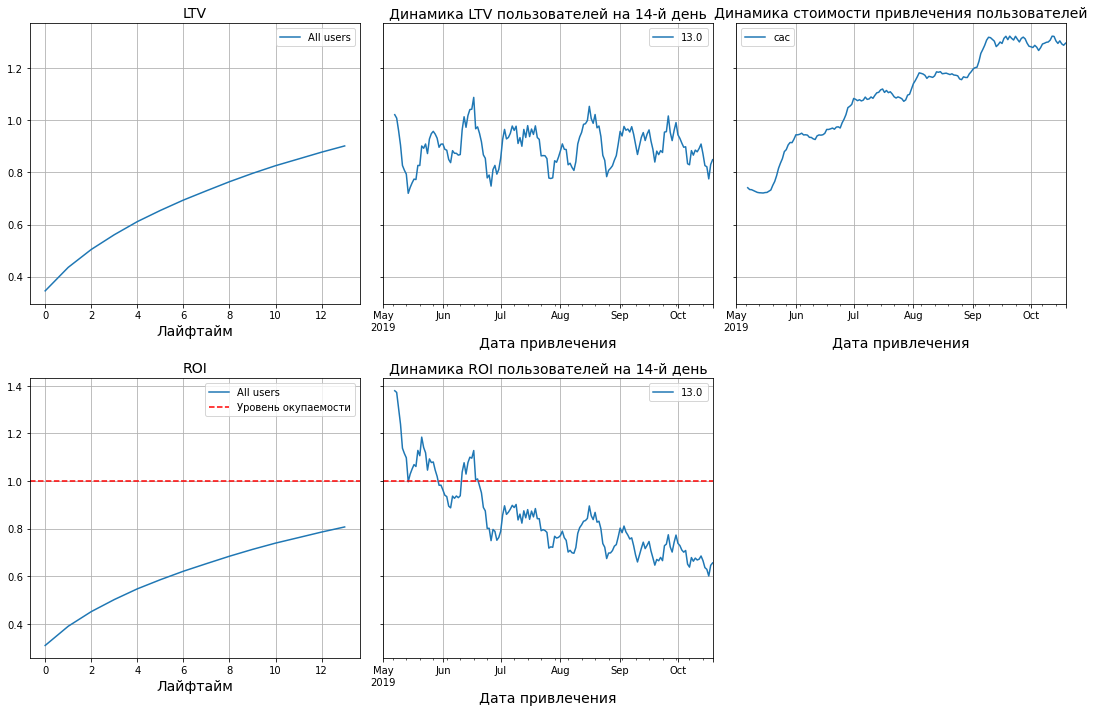

In [48]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:

- Реклама не окупается. ROI за две недели так и не превысила порог 100%, а составляет всего 80%.
- САС не стабилен. Средняя стоимость привлечения одного пользователя возрастает.
- LTV достаточно стабилен.

Теперь посмотрим конверсию пользователей и динамику её изменения.

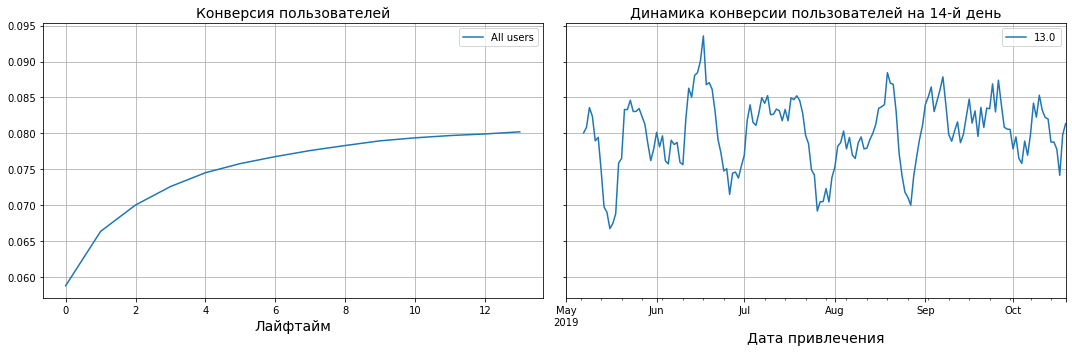

In [49]:
# смотрим конверсию 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

# построим графики конверсии и динамики конверсии пользователей
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Согласно графику конверсии пользователей на 14 день конверсия составляет 8%. График динамики конверсии показывает, что самая высокая конверсия была в середине июня, а самая низкая - в середине мая. Также конверсия ощутимо снижалась в конце июня, в конеце августа и в конце сентября.

Также посмотрим удержанием пользователей за 14 дней.

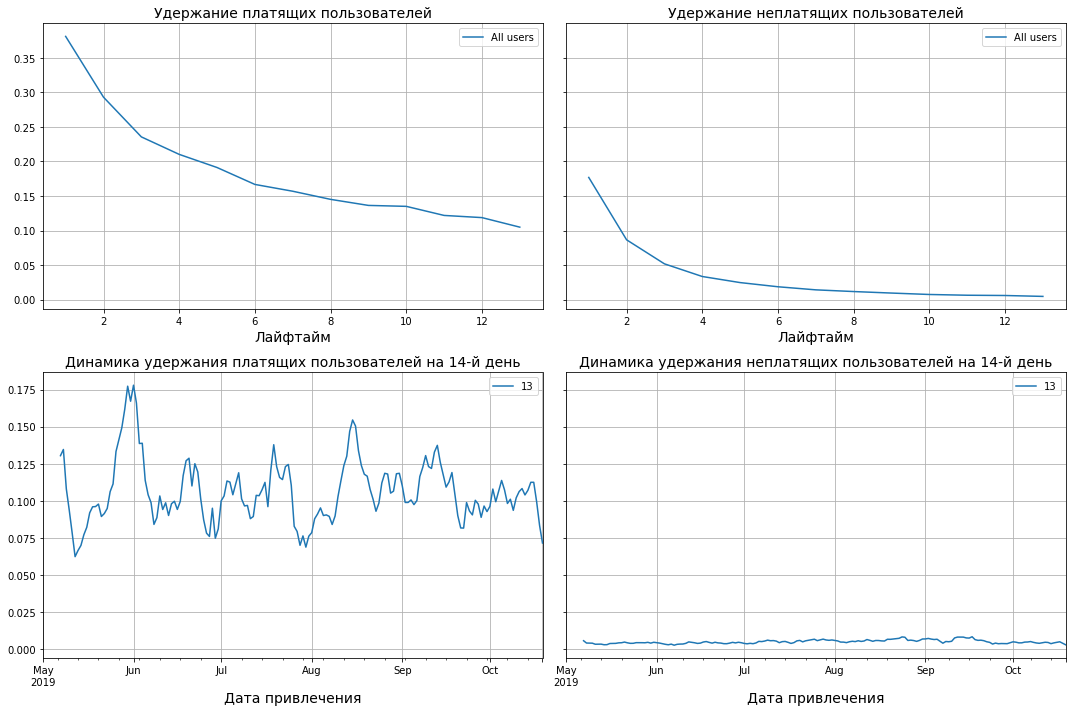

In [50]:
# смотрим удержание 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

# построим графики удержания и динамики удержания пользователей
plot_retention(retention_grouped, retention_history, horizon_days) 

По графикам удержания видно, что удержание платящих пользователей значительно выше удержания неплатящих. На графике динамики удержания платящих пользователей видно, что платящие пользователи максимально удерживались в конце мая - начало июня. Хуже платящие пользователи удерживались в конце июня и в конце июля. А график динамики удержания неплатящих пользователей практически не изменялся. 

Посмотрим конверсию и удержанием пользователей за 14 дней по странам.

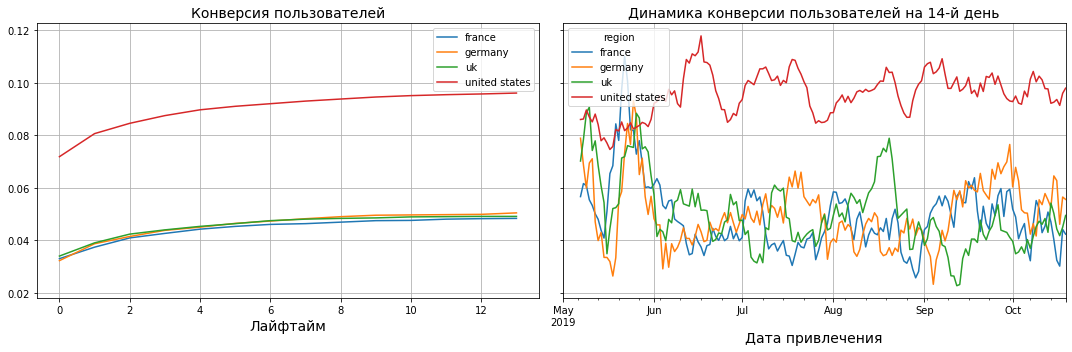

In [51]:
dimensions = ['region']

# смотрим конверсию 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# построим графики конверсии и динамики конверсии пользователей
plot_conversion(conversion_grouped, conversion_history, horizon_days)

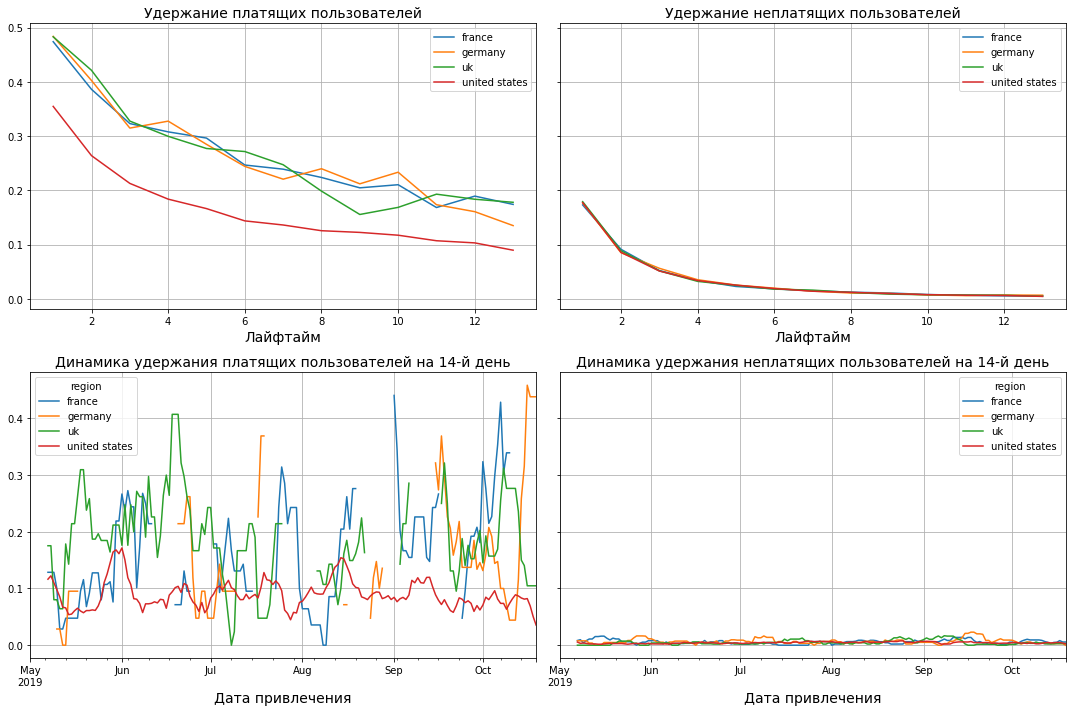

In [52]:
dimensions = ['region']

# смотрим удержание 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# построим графики удержания и динамики удержания пользователей
plot_retention(retention_grouped, retention_history, horizon_days) 

Согласно графику конверсий пользователей на 14 день по странам самая высокая конверсия пользователей из США, она составляет почти 9,8%. Для остальных стран конверсия пользователей составляет примерно 5%. При этом графики динамики конверсий видно, что динамика конверсии пользователей из США совпадает с общей динамикой конверсии: самая высокая конверсия в США была в середине июня, а самая низкая - в середине мая, также конверсия ощутимо снижалась в конце июня, в конеце августа и в конце сентября. Для Франции самая высокая конверсия была во второй половине мая, а низкая конверсия была в середине мая, середине июня, середине июля, в конце августа и в первой половине октября. Для Германии самая высокая конверсия наблюдается во второй половине мая, а также конверсия была достаточно высокой в конце сентября. А вот самые низкие конверсии пользователей из Германии были в середине мая, начало июня и начало сентября. Для Англии самые высокии конверсии пользователей были в первой и во второй половине мая, а также после середины августа. Низкие конверсии пользователей из Англии наблюдаются в первой половине июля и ближе к середине сентября.

По графикам удержания пользователей видно, что удержание платящих пользователей из США значительно ниже, чем удержание платящих пользователей из других стран. А вот удержание неплатящих пользователей по всем странам одинаково низкое. На графике динамики удержания платящих пользователей по странам видно, что платящие пользователи из США максимально удерживались в конце мая - начало июня и в ближе к середине августа, хуже удерживались в середине мая и в конце июля. Платящие пользователи из Франции максимально удерживались в начале сентября и в первой половине октября, также они хорошо удерживались в начале июня, во второй половине июля и в середине августа. Хуже удержание платящих французских пользователей было в первой половине мая и в первой половине августа. Платящие пользователи из Германии лучше всего удерживались в середине октября, в середине сентября и в середине июля. А хуже удержание платящих пользователей в Германии было в середине мая, во второй половине июня, в начале июля, во второй половине августа и в первой половине октября. Платящие пользователи из Англии максимально удерживались в середине июня, также они хорошо удерживались в середине мая, середине сентября и в первой половине октября. Хуже удержание платящих пользователей из Англии было в первой половине июля. А график динамики удержания неплатящих пользователей по всем странам практически не изменялся.

Посмотрим конверсию и удержанием пользователей за 14 дней по типам устройств.

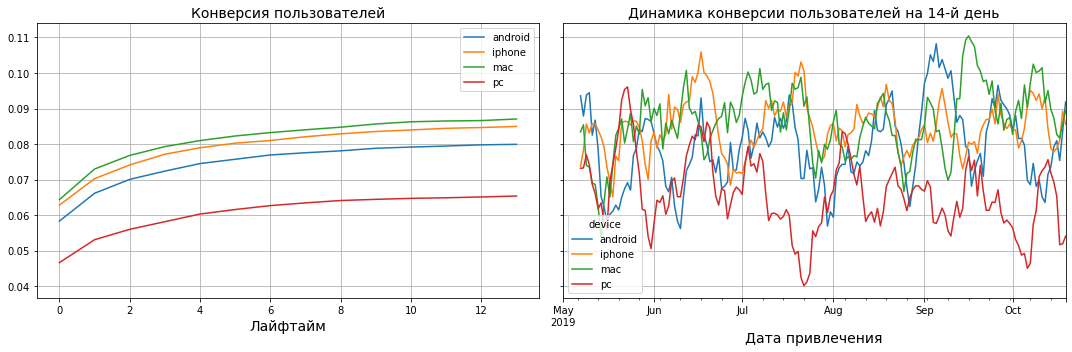

In [53]:
dimensions = ['device']

# смотрим конверсию 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# построим графики конверсии и динамики конверсии пользователей
plot_conversion(conversion_grouped, conversion_history, horizon_days)

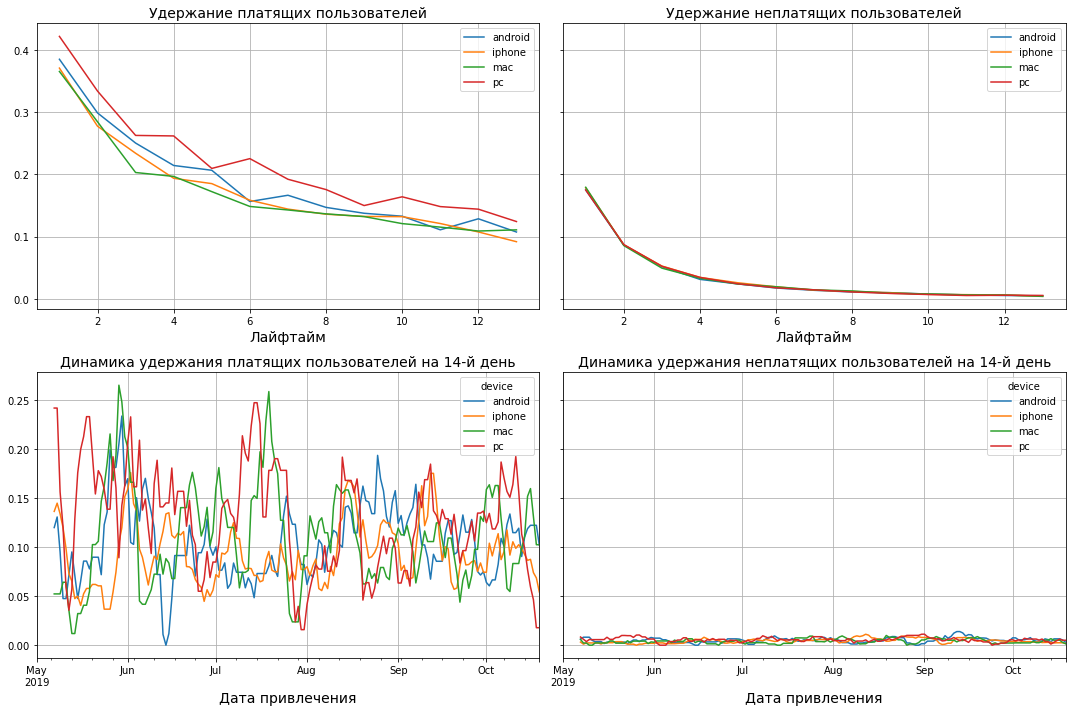

In [54]:
dimensions = ['device']

# смотрим удержание 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# построим графики удержания и динамики удержания пользователей
plot_retention(retention_grouped, retention_history, horizon_days) 

Согласно графику конверсии пользователей на 14 день конверсия для пользователей РС составляет 5%, конверсия для пользователей Android - 8%, конверсия для пользователей IPhone - 8,5%, конверсия для пользователей MAC - 8,75%. График динамики конверсии показывает, что самая высокая конверсия для пользователей РС была в второй половине мая, а также высокая конверсия пользователей РС - в середине июня и в начале августа. Самая низкая конверсия для пользователей РС была во второй половине июля, также конверсия ощутимо снижалась в конце мая и в первой половине октября. Самая высокая конверсия для пользователей Android - в первой половине сентября, также высокая конверсия для пользователей Android была в первой половине мая, середине июня, середине июля, во второй половине августа (ближе к середине месяца) и вво второй половине сентября (ближе к октябрю). Самая низкая конверсия для пользователей Android наблюдается в середине мая, первой половине июня и в конце июля, также конверсия снижалась во второй половине августа и в первой половине октября. Самая высокая конверсия для пользователей IPhone была в середине июня, а также конверсия возрастала в середине июля, середине августа, первой и второй половинах сентября и в первой половине октября. А спад конверсии пользователей IPhone виден в конце мая, ближе к июлю и в середине сентября. Самая низкая конверсия для пользователей IPhone - в середине мая. Максимальная конверсия для пользователей МАС наблюдается в середине сентября, также высокая конверсия была ближе к середине июня, в начале июля и в первой половине октября. Самая низкая конверсия для пользователей МАС - в середине мая, а также низкая конверся наблюдается во второй половине июля, во второй половине августа и в первой половине сентября.

По графику удержания платящих пользователей видно, что удержание платящих пользователей РС лучше, чем для пользователей других устройств. На графике динамики удержания платящих пользователей видно, что платящие пользователи РС лучше всего удерживались во второй половине мая (ближе к середине), в начале июня и ближе к середине июля; а хуже всего они удерживались в первой половине мая (ближе к середине месяца), в конце июля и в середине октября. Платящие пользователи Android лучше удерживались в конце мая и во второй половине августа, хуже - в середине мая и в первой половине июня (ближе к середине). Лучше всего платящие пользователи IPhone удерживались в начале июня, середине августа и в первой половине сентября (ближе к середине месяца), хуже - во второй половине мая, в конце июня, в начале августа и во второй половине сентября. Платящие пользователи МАС лучше всего удерживались в конце мая и середине июля, а хуже - в первой половине мая (ближе к середине), в начале июня, в конце июля и во втрой половине сентября. А график динамики удержания неплатящих пользователей по типам устройств практически не изменялся.

Посмотрим конверсию и удержанием пользователей за 14 дней по рекламным источникам.

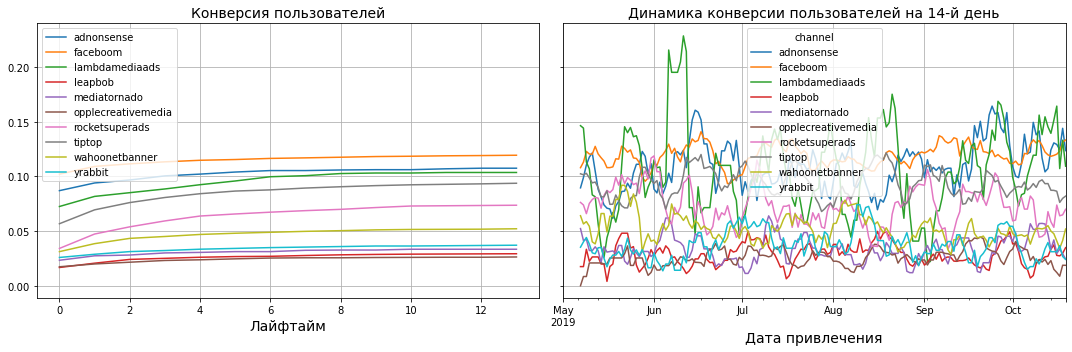

In [55]:
dimensions = ['channel']

# смотрим конверсию 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# построим графики конверсии и динамики конверсии пользователей
plot_conversion(conversion_grouped, conversion_history, horizon_days)

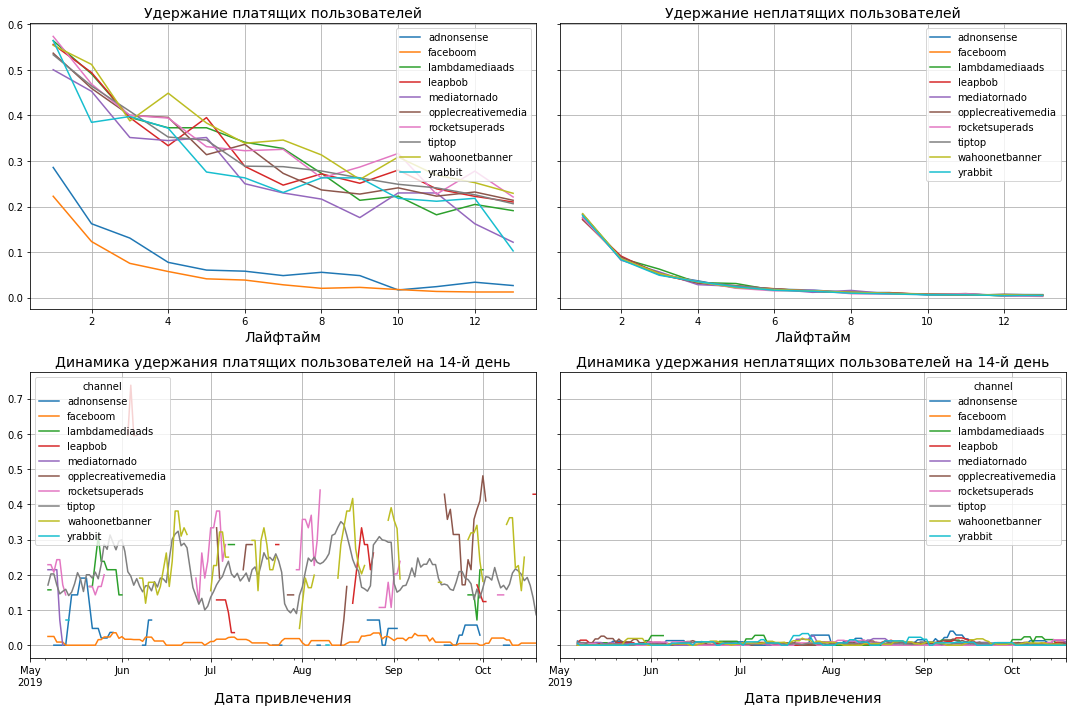

In [56]:
dimensions = ['channel']

# смотрим удержание 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# построим графики удержания и динамики удержания пользователей
plot_retention(retention_grouped, retention_history, horizon_days) 

Согласно графику конверсии пользователей на 14 день конверсия пользователей из рекламного источника Faceboom составляет примерно 12%, Adnonsense - 11%, Lambdamediaads - примерно 10,5%, Tiptop - примерно 9%, Rocketsuperads - примерно 7.5% и Wahoonetbanner - примерно 5%. Плохая конверсия у пользователей из рекламных источников Mediatornado (около 4%), Yrabbit (примерно 4%), Leapbob (около 3,5%) и Opplecreativemedia (около 3%). Графику динамики конверсии пользователей по рекламным источникам очень сильно выделяется рекламный канал Lambdamediaads: самая высокая конверсия у него была в первой половине июня, а потом во второй половине августа. 

На графике удержания платящих пользователей видно, что удержание платящих пользователей самое низкое у рекламных источников Faceboom и Adnonsense. На графике удержания неплатящих пользователей видно, что они плохо удерживаются вне зависимости от источника привлечения. График динамики удержания неплатящих пользователей по рекламным источникам практически не изменялся.

Посмотрим окупаемость рекламы с разбивкой по устройствам. Для этого построим графики LTV и ROI, а также графики динамики LTV, ROI и CAC с разбивкой по устройствам.

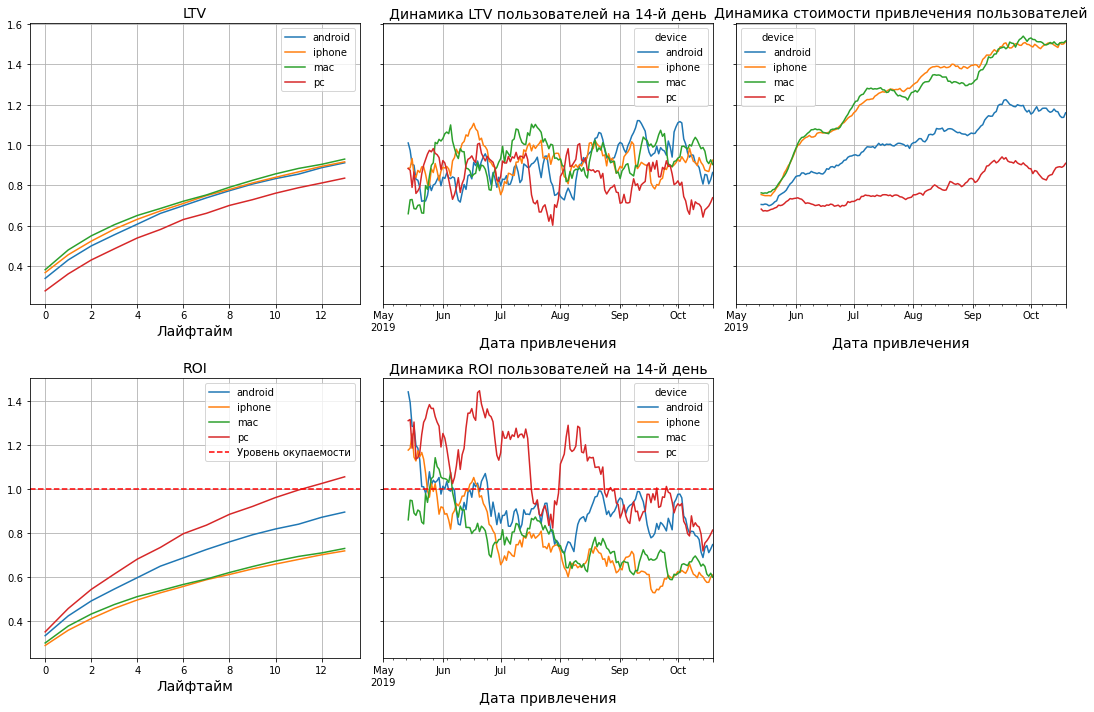

In [57]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики LTV и ROI, а также графики динамики LTV, ROI и CAC с разбивкой по устройствам
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV на всех устройствах стабилен. Согласно графику ROI пользователи РС окупаются, а вот пользователи MAC, IPhone и Android - нет. Но динамика ROI снижатеся на всех устройсвах. При этом динамика стоимости привлечения пользователей MAC и IPhone возрастает больше, чем динамика стоимости привлечения пользователей Android и РС. 

Теперь посмотрим окупаемость рекламы с разбивкой по странам. Для этого построим графики LTV и ROI, а также графики динамики LTV, ROI и CAC с разбивкой по странам.

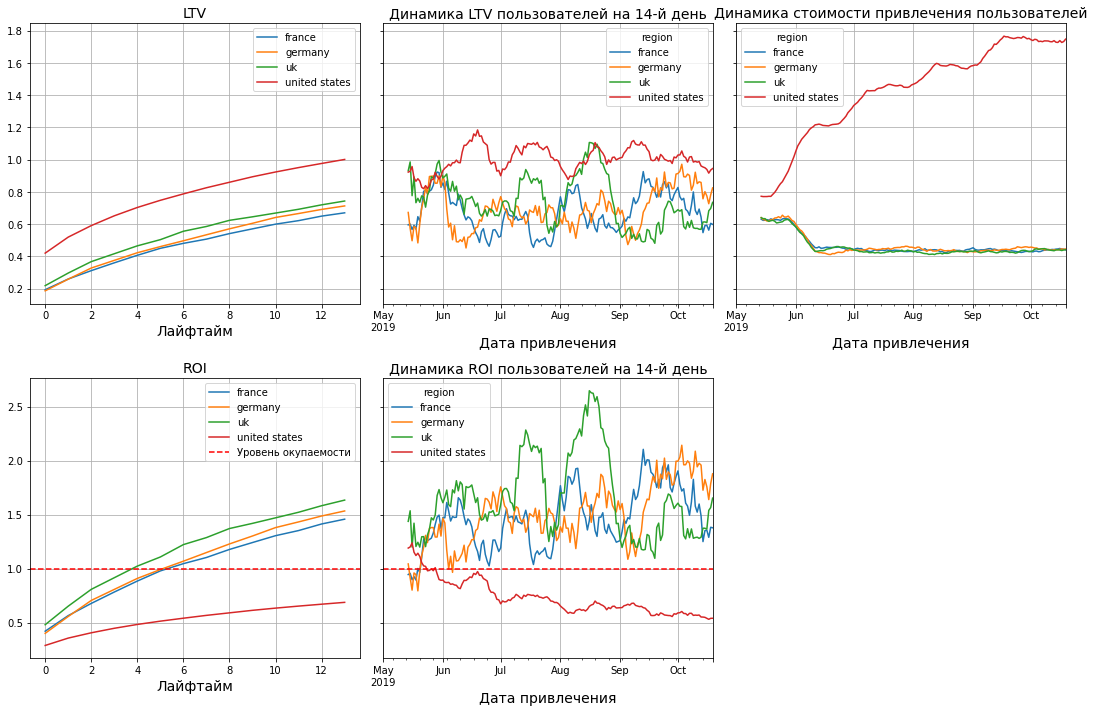

In [58]:
# смотрим окупаемость с разбивкой по странам
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики LTV и ROI, а также графики динамики LTV, ROI и CAC с разбивкой по странам
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

LTV стабилен во всех странах. Судя по графику ROI, реклама окупается в Англии, Германии и во Франции, а в США - нет. Это также видно на графике динамике ROI: динамика ROI пользователей из США снижается, а для остальных стран нет. При этом на графике динамики стоимости привлечения пользователей видно, что динамика стоимости привлечения пользователей для США возрастает в то время, как для других стран остается практически неизменной.

Посмотрим окупаемость рекламы с разбивкой по рекламным каналам. Для этого построим графики LTV и ROI, а также графики динамики LTV, ROI и CAC с разбивкой по рекламным каналам.

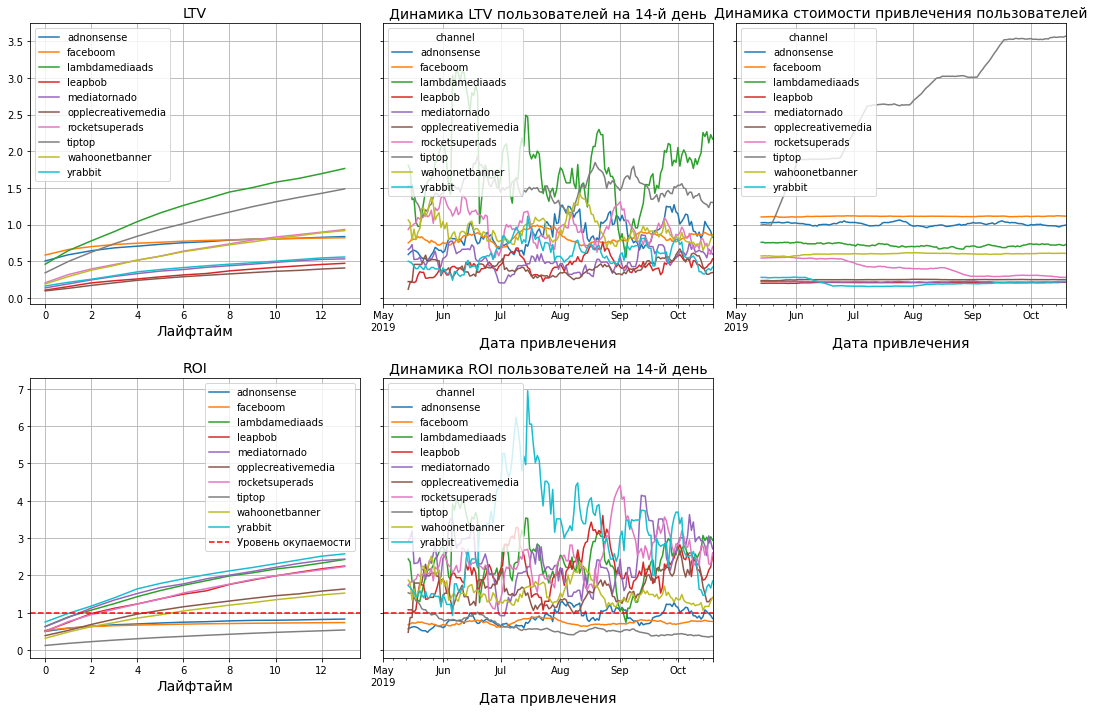

In [59]:
# смотрим окупаемость с разбивкой по рекламным каналам
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики LTV и ROI, а также графики динамики LTV, ROI и CAC с разбивкой по рекламным каналам
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV во всех рекламных источниках стабилен. Из графика динамики стоимости привлечения пользователей видно, что динамика стоимости привлечения пользователей Tiptop намного больше, чем у остальных рекламных источников.
Согласно графику ROI видно, что окупаются только 7 из 10 рекламных источников: Yrabbit, Mediatornado, Lambdamediaads, Rocketsuperads, Leapbob, Opplecreativemedia и Wahoonetbanner. Adnonsense, Faceboom и Tiptop - не окупаются.

**Вывод**

- В целом реклама на привлечение пользователей не окупается.
- Негативное влияние на окупаемость рекламы оказывают пользователи, которые заходят в приложение Procrastinate Pro+ с iPhone и MAC, а также те пользователи, которые находятся в США. Также негативно на окупаемость рекламы влияют расходы на такие рекламные источники, как Tiptop, Faceboom и Adnonsense.
- Проблемы окупаемости могут быть вызваны  тем, что средняя стоимость привлечения одного пользователя из рекламных источников возрастает. Также проблемы могут быть чисто техническими (например, у пользователей IPhone и МАС могли возникнуть сложности с оплатой). По мимо этого необходимо посмотреть, почему в США с таким количеством пользователей (100 002) не окупается реклама.

## Итоговый вывод

Мы загрузили данные приложения Procrastinate Pro+ о визитах, заказах и рекламных расходах из CSV-файлов в переменные visits, orders и costs. Изучив информацию о данных, сделали предобработку данных: привели все названия к единому регистру написания, изменили тип данных в столбцах 'session_start', 'session_end', 'event_dt' и 'dt'. Также проверили, что в датафреймах отсутствуют явные дубликаты.

Далее написали функции для создания профилей, расчёта удержания, конверсии, LTV и ROI: get_profiles(), get_retention(), get_conversion() и get_ltv(). А также написали функции для построения графиков визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

В исходных данных у нас имеется информация о пользователях из четырех стран: США, Англия, Франция и Германия. Как видно из таблицы 'user_region' большее количество пользователей приложением Procrastinate Pro+ находятся в США (100 002 пользователя), что составляет 66,66% из всех пользователей приложением Procrastinate Pro+. Количество платящих пользователей в США - 6 902, что составляет 6,90% от всех пользователей в США. Почти равное количество пользователей в Англии и Франции (17 575 и 17 450 соответвенно). Доля из всех пользователей в Англии составляет 11,72%, а во Франции - 11,63%. Количество платящих пользователей в Англии - 700 человек (3,98% от всех пользователей в Англии), а во Франции - 663 человека (3,80% от всех пользователей во Франции). В Германии количество пользователей приложением Procrastinate Pro+ составляет 14 981 (9,99% от всех пользователей) и 616 платящих пользователей, что составляет 4,11% от всех пользователей в Германии.

Также выяснили, что большее количество пользователей приложения Procrastinate Pro+ используют IPhone - 54 479 человек (36,32% от всех пользователей приложением), из них 3 382 человека являются платящими. Доля платящих пользователей из использующих IPhone составляет 6,21%. Android использует 35 032 пользователей приложения (23,35% от всех пользователей приложения), из них 2 050 человек являются платящими. Доля платящих пользователей из использующих Android составляет 5,85%. Персональным компьютером (РС) пользуется 30 455 пользователей приложения Procrastinate Pro+ (20,30% от всех пользователей приложения), из них 1 537 человек являются платящими. Доля платящих пользователей из использующих РС составляет 5,05%. МАС использует 30 042 пользователей приложения (20,03% от всех пользователей приложения), из них 1 912 человек являются платящими. Доля платящих пользователей из использующих МАС составляет 6,36%.

Затем изучив рекламные источники, выяснили, что из 11 источников, из которых приходят пользователи приложения Procrastinate Pro+, на первом месте по привлечению платящих пользователей находится рекламный источник Faceboom. Доля платящих пользователей в этом источнике составляет 12,20% от общего количества пользователей (29 144 человека), привлеченных этим источником. Далее идут рекламные источники Adnonsense, Lambdamediaads и Tiptop. Доля платящих пользователей в Adnonsense составляет 11,34% от 3 880 пользователей, привлеченных этим источником. Доля платящих пользователей в Lambdamediaads составляет 10,47% от 2 149 количества пользователей, привлеченных этим источником. Доля платящих пользователей в Tiptop составляет 9,6% от общего количества пользователей (19 561 человек), привлеченных этим источником. Рекламные источники Rocketsuperads и Wahoonetbanner привлекли 4 448 пользователей и 8 553 пользователя соответственно. А вот доля платящий пользователей составляет 7, 91% для рекламного источника Rocketsuperads и 5,30% для Wahoonetbanner. Доля платящих пользователей в рекламном источнике Yrabbit составляет 3,83% от 4 312 пользователей, привлеченных этим источником. Реламный источник Mediatornado привлек 4 364 пользователя, доля платящих из них составила 3,57%. А рекламные источники Leapbob и Opplecreativemedia привлекли по 8 553 и 8 605 пользователей соответственно, но доли платящих пользователей составили 3,06% для Leapbob и 2,71% для Opplecreativemedia. Количество пользователей, которые сами находят приложение Procrastinate Pro+ составляет 56 439, но только 1 160 пользователей являются платящими (это 2,06% от органического количества пользователей).

Далее мы рассчитали: сколько было потрачено на каждый рекламный канал. Больше всего было расходов на рекламный источник Tiptop (54 751,30). Далее по расходам идет Faceboom - 32 445,60. Затем расходы распределяются так: рекламный источник Wahoonetbanner - 5 151; Adnonsense - 3 911,25; Opplecreativemedia - 2 151,25; Rocketsuperads - 1 833; Leapbob - 1 797,60; Lambdamediaads - 1 557,60. Меньше всего расходов было на рекламные источники Mediatornado (954,48) и Yrabbit (944,22).

После мы сделали графики динамики изменения расходов во времени по каждому рекламному каналу. Судя по графику динамики изменения расходов по неделям, выделяется два рекламных источника: Tiptop и Faceboom. Можно наблюдать рост расходов по этим рекламным каналам, хотя есть и недели, когда наблюдался спад расходов. С 18ой по 20ую неделю рост расходов особо ненаблюдается у Tiptop, а после 20ой неделе заметен рост расходов с 500 почти до 1500. Далее в период с 25ой недели по 31ую неделю динамика расходов по этому рекламному источнику колеблется в пределах от 1500 до 2500. После 31ой недели рост расходов на Tiptop практически не меняется, а вот примерно после 37ой недели резко возрастает от 2500 до 4000. После 39ой недели рост расходов на рекламный источник Tiptop снижается до 2750, а после примерно 43ей недели снова наблюдается рост расходов по этому рекламному источнику. Насчет динамики расходов на рекламный источник Faceboom резких колебаний расходов, как на Tiptop нет. После 21ой недели есть рост расходов на Faceboom с примерно 750 до 1250, далее рост расходов снижается до 1000 и после 24ой недели начинает расти до 1600. С 26ой недели по 29ую неделю на графике виден спад расходов на этот рекламный источник (с 1600 до 1000). Далее динамика изменения расходов на Faceboom колеблется от 1400 до 1490, а после 35ой недели снижается до примерно 1200. После 37ой недели снова есть рост расходов на этот рекламный источник (с 1200 до 1800). А с 39ой недели динамика расходов на Faceboom снижается до примерно 1250 и, как у рекламного источника Tiptop, примерно 43ей недели снова наблюдается рост расходов на Faceboom. По расходам на остальные рекламные источники можно сказать, что они практически не изменялись по неделям.

Динамика изменения расходов по месяцам для каждого рекламного источника похожа на динамику изменения расходов по неделям. На графике виден более плавный рост расходов на рекламный источник Tiptop - с мая по сентябрь расходы на этот рекламный источник возрастают с 2500 до примерно 13500, а с сентября по октябрь наблюдается спад расходов до примерно 12100. Рост расходов на рекламный источник Faceboom наблюдается с мая по июнь (примерно с 3500 до 5500). Также рост расходов на этот рекламный источник виден с июля по август, а после августа расходы на Faceboom потихоньку начали снижаться. Также можно отменить, что с мая по июнь снизились расходы на рекламный источник Adnonsense, а по Wahoonetbanner немного возрасли расходы. По остальным рекламным источникам динамики изменений расходов по месяцам не наблюдается.

Затем мы рассчитали среднее привлечение пользователей для каждого рекламного источника и выяснили, что самое дорогое привлечение пользователей у рекламного источника Tiptop - 2.80 в среднем на привлечение одного пользователя. Далее по дороговизне привлечения пользователей идут рекламные источники Faceboom (1.11 в среднем на привлечение одного пользователя) и Adnonsense (1.01 в среднем на привлечение одного пользователя). Среднее привлечение одного пользователя составляет 0.72 для рекламного источника Lambdamediaads, 0.60 для Wahoonetbanner и 0.41 для Rocketsuperads. Для рекламного источника Opplecreativemedia среднее привлечение одного пользователя составляет 0.25, для Mediatornado и Yrabbit - 0.22 среднее привлечение одного пользователя. Самое дешевое среднее привлечение одного пользователя у рекламного источника Leapbob - 0.21. А среднее привлечение одного пользователя по всему проекту составляет 0.7

Далее мы сделали графики конверсии и динамики конверсии пользователей, а также графики удержания платящих и неплатящих пользователей. Чтобы проанализировать окупаемость рекламы, мы исключили из таблицы профилей пользователей, которые сами пришли в приложение, так как их привлечение ничего не стоило; за момент анализа мы взяли 1 ноября 2019г., а за горизонт анализа - 14 дней. 

Согласно графику конверсии пользователей на 14 день конверсия составляет 8%. График динамики конверсии показывает, что самая высокая конверсия была в середине июня, а самая низкая - в середине мая. Также конверсия ощутимо снижалась в конце июня, в конеце августа и в конце сентября.

По графикам удержания видно, что удержание платящих пользователей значительно выше удержания неплатящих. На графике динамики удержания платящих пользователей видно, что платящие пользователи максимально удерживались в конгце мая - начало июня. Хуже платящие пользователи удерживались в конце июня и в конце июля. А на графике динамики удержания неплатящих пользователей динамика удержания практически не наблюдается.

Также мы рассмотрелии конверсии и удержание пользователей по странам, типам устройств и рекламным источникам.

Согласно графику конверсий пользователей на 14 день по странам самая высокая конверсия пользователей из США, она составляет почти 9,8%. Для остальных стран конверсия пользователей составляет примерно 5%. При этом графики динамики конверсий видно, что динамика конверсии пользователей из США совпадает с общей динамикой конверсии: самая высокая конверсия в США была в середине июня, а самая низкая - в середине мая, также конверсия ощутимо снижалась в конце июня, в конеце августа и в конце сентября. Для Франции самая высокая конверсия была во второй половине мая, а низкая конверсия была в середине мая, середине июня, середине июля, в конце августа и в первой половине октября. Для Германии самая высокая конверсия наблюдается во второй половине мая, а также конверсия была достаточно высокой в конце сентября. А вот самые низкие конверсии пользователей из Германии были в середине мая, начало июня и начало сентября. Для Англии самые высокии конверсии пользователей были в первой и во второй половине мая, а также после середины августа. Низкие конверсии пользователей из Англии наблюдаются в первой половине июля и ближе к середине сентября.

По графикам удержания пользователей видно, что удержание платящих пользователей из США значительно ниже, чем удержание платящих пользователей из других стран. А вот удержание неплатящих пользователей по всем странам одинаково низкое. На графике динамики удержания платящих пользователей по странам видно, что платящие пользователи из США максимально удерживались в конце мая - начало июня и в ближе к середине августа, хуже удерживались в середине мая и в конце июля. Платящие пользователи из Франции максимально удерживались в начале сентября и в первой половине октября, также они хорошо удерживались в начале июня, во второй половине июля и в середине августа. Хуже удержание платящих французских пользователей было в первой половине мая и в первой половине августа. Платящие пользователи из Германии лучше всего удерживались в середине октября, в середине сентября и в середине июля. А хуже удержание платящих пользователей в Германии было в середине мая, во второй половине июня, в начале июля, во второй половине августа и в первой половине октября. Платящие пользователи из Англии максимально удерживались в середине июня, также они хорошо удерживались в середине мая, середине сентября и в первой половине октября. Хуже удержание платящих пользователей из Англии было в первой половине июля. А график динамики удержания неплатящих пользователей по всем странам практически не изменялся.

Согласно графику конверсии пользователей на 14 день конверсия для пользователей РС составляет 5%, конверсия для пользователей Android - 8%, конверсия для пользователей IPhone - 8,5%, конверсия для пользователей MAC - 8,75%. График динамики конверсии показывает, что самая высокая конверсия для пользователей РС была в второй половине мая, а также высокая конверсия пользователей РС - в середине июня и в начале августа. Самая низкая конверсия для пользователей РС была во второй половине июля, также конверсия ощутимо снижалась в конце мая и в первой половине октября. Самая высокая конверсия для пользователей Android - в первой половине сентября, также высокая конверсия для пользователей Android была в первой половине мая, середине июня, середине июля, во второй половине августа (ближе к середине месяца) и вво второй половине сентября (ближе к октябрю). Самая низкая конверсия для пользователей Android наблюдается в середине мая, первой половине июня и в конце июля, также конверсия снижалась во второй половине августа и в первой половине октября. Самая высокая конверсия для пользователей IPhone была в середине июня, а также конверсия возрастала в середине июля, середине августа, первой и второй половинах сентября и в первой половине октября. А спад конверсии пользователей IPhone виден в конце мая, ближе к июлю и в середине сентября. Самая низкая конверсия для пользователей IPhone - в середине мая. Максимальная конверсия для пользователей МАС наблюдается в середине сентября, также высокая конверсия была ближе к середине июня, в начале июля и в первой половине октября. Самая низкая конверсия для пользователей МАС - в середине мая, а также низкая конверся наблюдается во второй половине июля, во второй половине августа и в первой половине сентября.

По графику удержания платящих пользователей видно, что удержание платящих пользователей РС лучше, чем для пользователей других устройств. На графике динамики удержания платящих пользователей видно, что платящие пользователи РС лучше всего удерживались во второй половине мая (ближе к середине), в начале июня и ближе к середине июля; а хуже всего они удерживались в первой половине мая (ближе к середине месяца), в конце июля и в середине октября. Платящие пользователи Android лучше удерживались в конце мая и во второй половине августа, хуже - в середине мая и в первой половине июня (ближе к середине). Лучше всего платящие пользователи IPhone удерживались в начале июня, середине августа и в первой половине сентября (ближе к середине месяца), хуже - во второй половине мая, в конце июня, в начале августа и во второй половине сентября. Платящие пользователи МАС лучше всего удерживались в конце мая и середине июля, а хуже - в первой половине мая (ближе к середине), в начале июня, в конце июля и во втрой половине сентября. А график динамики удержания неплатящих пользователей по типам устройств практически не изменялся.

Согласно графику конверсии пользователей на 14 день конверсия пользователей из рекламного источника Faceboom составляет примерно 12%, Adnonsense - 11%, Lambdamediaads - примерно 10,5%, Tiptop - примерно 9%, Rocketsuperads - примерно 7.5% и Wahoonetbanner - примерно 5%. Плохая конверсия у пользователей из рекламных источников Mediatornado (около 4%), Yrabbit (примерно 4%), Leapbob (около 3,5%) и Opplecreativemedia (около 3%). Графику динамики конверсии пользователей по рекламным источникам очень сильно выделяется рекламный канал Lambdamediaads: самая высокая конверсия у него была в первой половине июня, а потом во второй половине августа.
На графике удержания платящих пользователей видно, что удержание платящих пользователей самое низкое у рекламных источников Faceboom и Adnonsense. На графике удержания неплатящих пользователей видно, что они плохо удерживаются вне зависимости от источника привлечения. График динамики удержания неплатящих пользователей по рекламным источникам практически не изменялся.

После этого мы построили графики с разбивками по типам устройств, регионам и рекламным источникам, чтобы оценить окупаемость привлеченных пользователей.

Согласно графику ROI пользователи РС окупаются, а вот пользователи MAC, IPhone и Android - нет. Но динамика ROI снижатеся на всех устройсвах. При этом динамика стоимости привлечения пользователей MAC и IPhone возрастает больше, чем динамика стоимости привлечения пользователей Android и РС. LTV на всех устройствах стабилен.

Судя по графику ROI, реклама окупается в Англии, Германии и во Франции, а в США - нет. Это также видно на графике динамике ROI: динамика ROI пользователей из США снижается, а для остальных стран нет. При этом на графике динамики стоимости привлечения пользователей видно, что динамика стоимости привлечения пользователей для США возрастает в то время, как для других стран остается практически неизменной. LTV стабилен во всех странах.

Из графика динамики стоимости привлечения пользователей видно, что динамика стоимости привлечения пользователей Tiptop намного больше, чем у остальных рекламных источников. Согласно графику ROI видно, что окупаются только 7 из 10 рекламных источников: Yrabbit, Mediatornado, Lambdamediaads, Rocketsuperads, Leapbob, Opplecreativemedia и Wahoonetbanner. Adnonsense, Faceboom и Tiptop - не окупаются. LTV во всех рекламных источниках стабилен.

В итоге:
- В целом реклама на привлечение пользователей не окупается. ROI за две недели так и не превысила порог 100%, а составляет всего 80%.
- Негативное влияние на окупаемость рекламы оказывают пользователи, которые заходят в приложение Procrastinate Pro+ с iPhone и MAC, а также те пользователи, которые находятся в США. Также негативно на окупаемость рекламы влияют расходы на такие рекламные источники, как Tiptop, Faceboom и Adnonsense.
- Проблемы окупаемости могут быть вызваны тем, что средняя стоимость привлечения одного пользователя из рекламных источников возрастает. Также проблемы могут быть чисто техническими (например, у пользователей IPhone, МАС и Android могли возникнуть сложности с оплатой). По мимо этого необходимо посмотреть, почему в США с таким количеством пользователей (100 002) не окупается реклама.

**Рекомендации для отдела маркетинга**

- Перестать закупать рекламу на дорогих каналах Tiptop, Faceboom и Adnonsense, а направить ресурсы на более выгодные рекламные ресурсы (например, на Yrabbit).
- Выяснить: какие могут быть технические проблемы у пользователей IPhone, МАС и Android, а также возможно сделать для этих пользователей специальное маркетинговое предложение.
- Также сделать специальное маркетинговое предложение для пользователей из США. Ведь количество этих пользователей составляет 66,66% от всех пользователей приложением Procrastinate Pro+ и только 6,90% пользователей США являются платящими.